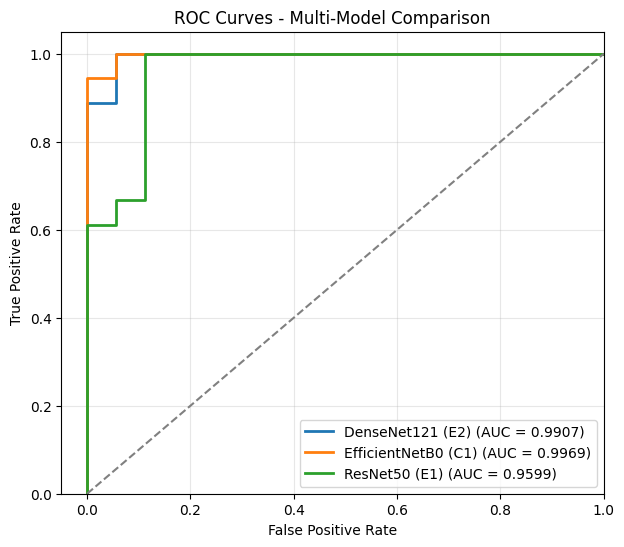

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Lista de modelos e pastas correspondentes
model_dirs = {
    "DenseNet121 (E2)": "Select3/Densenet121E2 Subnet",
    "EfficientNetB0 (C1)": "Select3/EfficientnetB0 Subnet",
    "ResNet50 (E1)": "Select3/Resnet50E Subnet"
}

# Carregue seu y_true (deve ser igual para todos os modelos)
y_true = np.load("Select3/Resnet50E Subnet/y_true.npy")  # ajuste o caminho

plt.figure(figsize=(7, 6))
i = 0
for model_name, folder in model_dirs.items():
    # Caminho do arquivo de predições
    all_probs_path = os.path.join(folder, "all_probs.npy")
    all_probs = np.load(all_probs_path)

    # Calcular média das probabilidades se houver várias execuções
    mean_probs = np.mean(np.array(all_probs), axis=0)

    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_true, mean_probs)
    roc_auc = auc(fpr, tpr)

    # Plotar curva
    if(i == 0):
        plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = 0.9907)")
    else:
        plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.4f})")
    i += 1

# Linha diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Ajustes do gráfico
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multi-Model Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


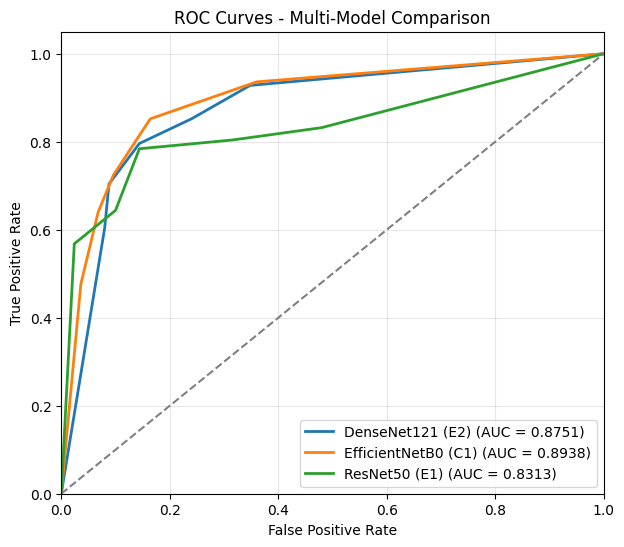

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Lista de modelos e pastas correspondentes
model_dirs = {
    "DenseNet121 (E2)": "Densenet121/E2",
    "EfficientNetB0 (C1)": "EficientnetB0/C",
    "ResNet50 (E1)": "Resnet50/E"
}

# Carregue seu y_true (deve ser igual para todos os modelos)
y_true = np.load("Densenet121/E2/y_true.npy")  # ajuste o caminho

plt.figure(figsize=(7, 6))
i = 0
for model_name, folder in model_dirs.items():
    # Caminho do arquivo de predições
    all_preds_path = os.path.join(folder, "all_preds.npy")
    all_preds = np.load(all_preds_path)

    # Calcular média das probabilidades se houver várias execuções
    mean_probs = np.mean(np.array(all_preds), axis=0)

    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_true, mean_probs)
    roc_auc = auc(fpr, tpr)

    # Plotar curva
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.4f})")
    i += 1

# Linha diagonal
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Ajustes do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multi-Model Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
